# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split

# Load in the data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
x_train.dtype

dtype('uint8')

# Extract first 10000 samples

In [4]:
X  = x_train[0:10000, :]

In [5]:
X.shape # N x T x D

(10000, 28, 28)

In [6]:
y = y_train[0:10000]

In [7]:
y.shape

(10000,)

# Perform Train test split

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.1)

In [9]:
train_data[0].shape  # shape of the first sample of train_data

(28, 28)

# Create the Model

In [10]:
i = Input(train_data[0].shape) # T x D. Here  T x D = 28 x 28
rnn = Bidirectional(LSTM(128))
X = rnn(i)
X = Dense(10, activation='softmax')(X)
model = Model(i, X)

In [11]:
# i = Input(train_data[0].shape) # T x D. Here  T x D = 28 x 28
# x = LSTM(128)(i)
# x = Dense(10, activation='softmax')(x)
# model = Model(i, x)

# Compile the Model

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [13]:
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 50)

Epoch 1/50
282/282 [==============================] - 8s 20ms/step - loss: 0.6736 - accuracy: 0.7970 - val_loss: 0.3845 - val_accuracy: 0.8700
Epoch 2/50
282/282 [==============================] - 5s 18ms/step - loss: 0.2801 - accuracy: 0.9097 - val_loss: 0.3265 - val_accuracy: 0.8930
Epoch 3/50
282/282 [==============================] - 5s 17ms/step - loss: 0.2177 - accuracy: 0.9309 - val_loss: 0.2788 - val_accuracy: 0.9100
Epoch 4/50
282/282 [==============================] - 5s 17ms/step - loss: 0.1768 - accuracy: 0.9422 - val_loss: 0.2593 - val_accuracy: 0.9110
Epoch 5/50
282/282 [==============================] - 5s 17ms/step - loss: 0.1472 - accuracy: 0.9529 - val_loss: 0.2752 - val_accuracy: 0.9090
Epoch 6/50
282/282 [==============================] - 5s 17ms/step - loss: 0.1310 - accuracy: 0.9568 - val_loss: 0.2603 - val_accuracy: 0.9260
Epoch 7/50
282/282 [==============================] - 5s 17ms/step - loss: 0.1253 - accuracy: 0.9573 - val_loss: 0.2512 - val_accuracy: 0.9230

# Visualize the Model Performance

In [14]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

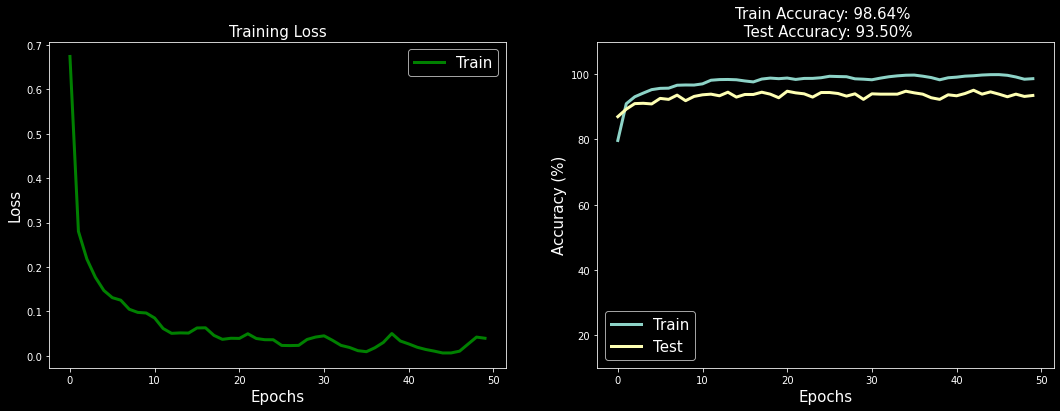

In [15]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()